In [38]:
import seaborn as sns
import numpy as np
import pandas as pd

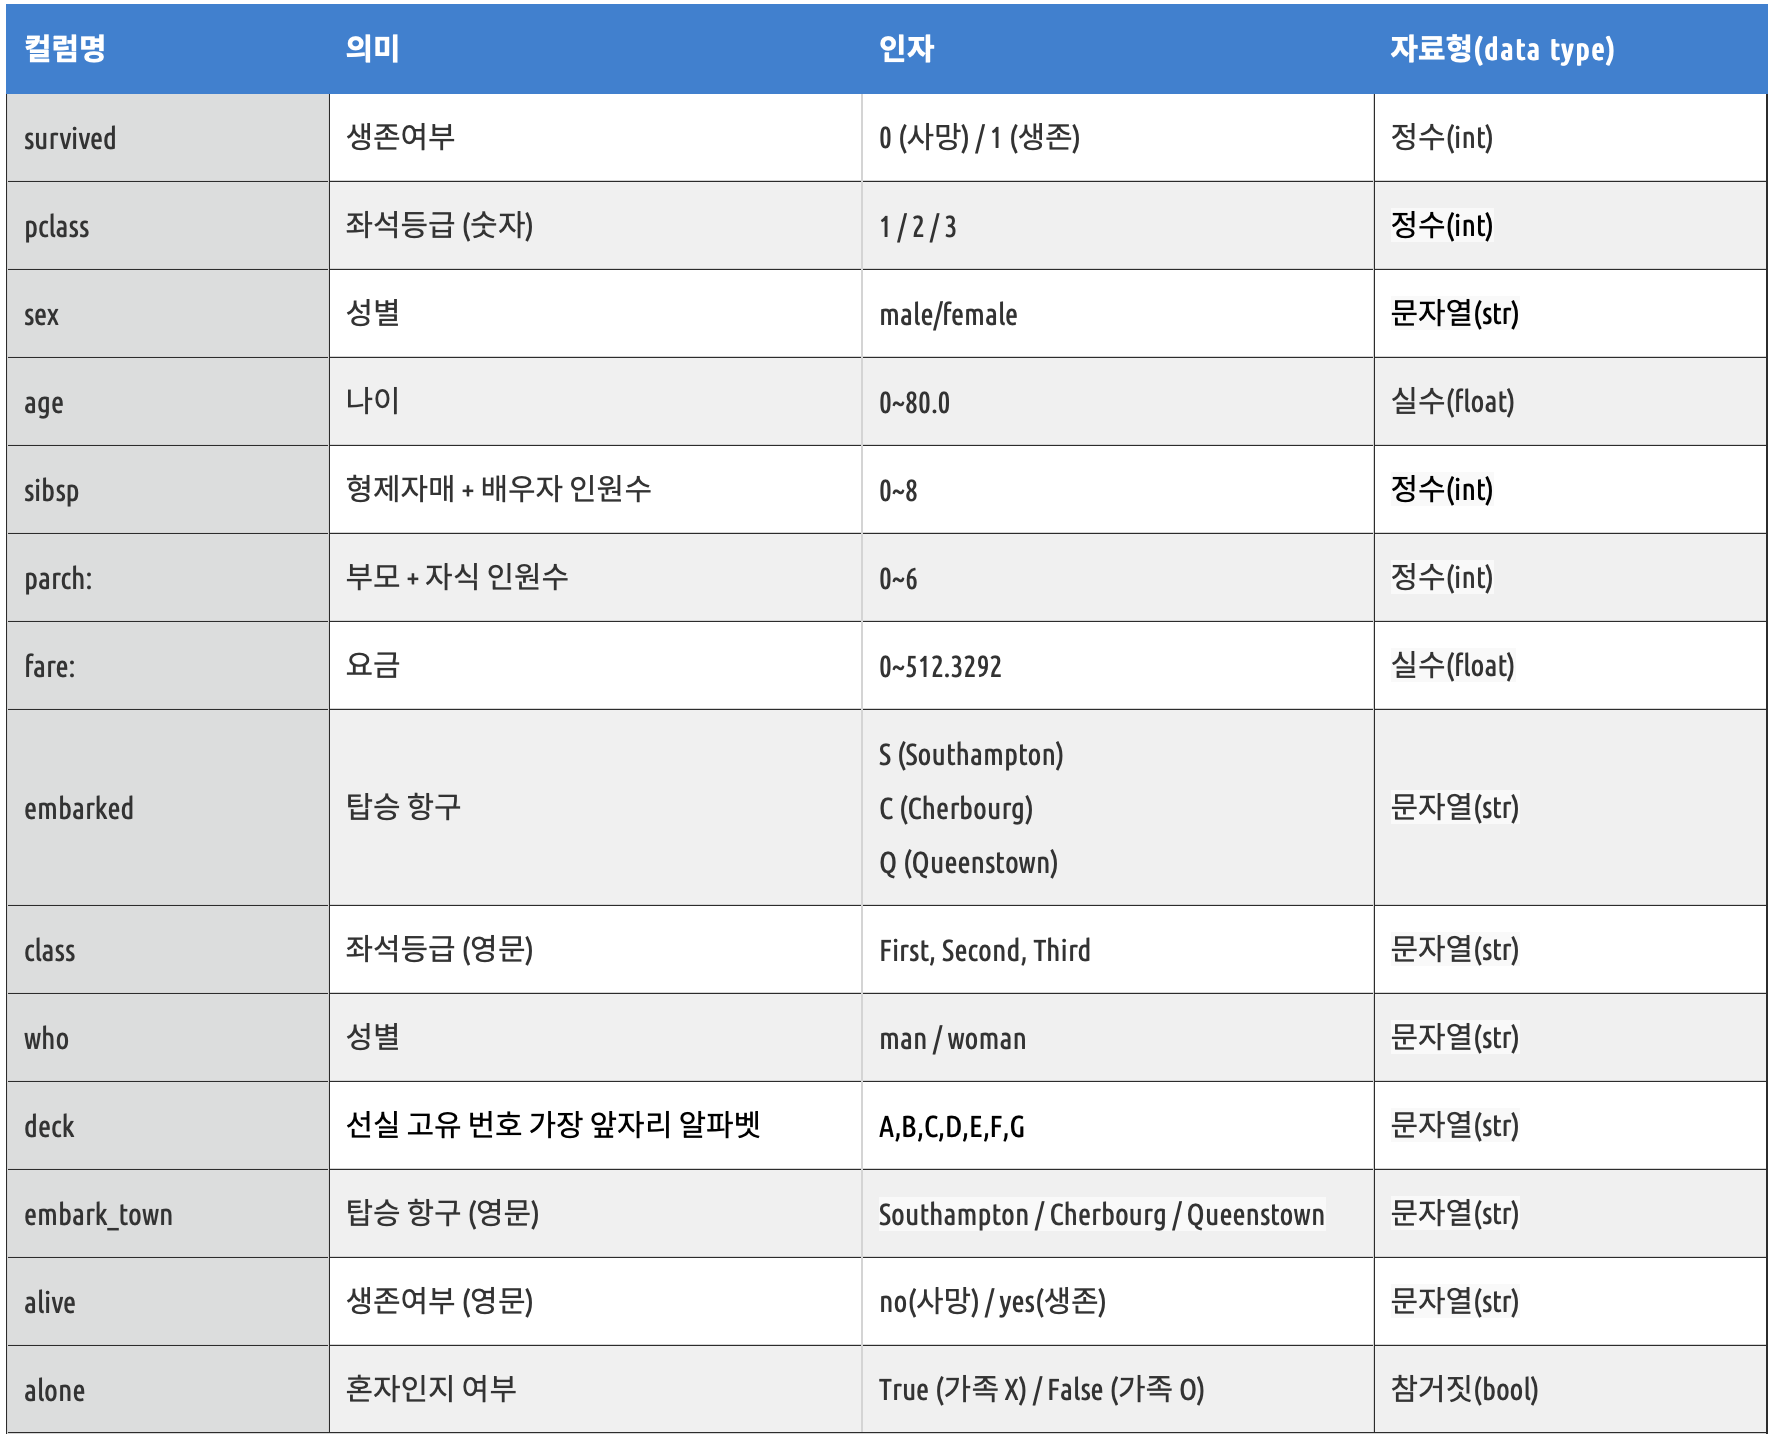

In [9]:
df = sns.load_dataset("titanic")

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


isnull() -> matrix  
isnull().sum() -> scala  
isnull().sum().sum() -> vector  

In [15]:
# 전체 null 값 확인
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
# dataframe 의 정보 확인
df.info()

# Dtype - category : 범주, object : 객체

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [19]:
df['deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [20]:
df['alive']

0       no
1      yes
2      yes
3      yes
4       no
      ... 
886     no
887    yes
888     no
889    yes
890     no
Name: alive, Length: 891, dtype: object

In [22]:
import numpy as np

df_number = df.select_dtypes(include=np.number)
df_object = df.select_dtypes(exclude=np.number)

In [23]:
df_number

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [24]:
df_object

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,NaN,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True


In [25]:
df.shape

(891, 15)

In [26]:
df_number.shape

(891, 6)

In [27]:
df_object.shape

(891, 9)

In [28]:
df_number.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [29]:
df_object.columns

Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [31]:
df_number.mean(1)

0       5.541667
1      18.713883
2       6.320833
3      15.183333
4       7.675000
         ...    
886     7.000000
887     8.500000
888     5.890000
889     9.666667
890     7.125000
Length: 891, dtype: float64

In [32]:
df_object['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [33]:
df_object['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [35]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_number.describe(include='all')

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
df_object.describe(include='all')

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


In [44]:
x = pd.Series({'one':1, 'two':2, 'three':3})
y = pd.Series({1:'triangle', 2:'square', 3:'circle'})

In [45]:
x

one      1
two      2
three    3
dtype: int64

In [46]:
y

1    triangle
2      square
3      circle
dtype: object

In [47]:
x.map(y)

one      triangle
two        square
three      circle
dtype: object

In [48]:
y.map(x)

1   NaN
2   NaN
3   NaN
dtype: float64

In [49]:
rpl_dict = {'male':1, 'female':0}

df['sex'].map(rpl_dict)[:5]

0    1
1    0
2    0
3    0
4    1
Name: sex, dtype: int64

In [50]:
df['sex'].map(lambda value : 1 if value == 'male' else 0)[:5]

0    1
1    0
2    0
3    0
4    1
Name: sex, dtype: int64

In [53]:
df_tmp = pd.DataFrame(np.arange(12).reshape(4,3), columns=['a', 'b', 'c'])
df_tmp

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [56]:
df_tmp['a'].apply(lambda x:x*2)

0     0
1     6
2    12
3    18
Name: a, dtype: int64

In [58]:
df_tmp.apply(lambda x:sum(x))

a    18
b    22
c    26
dtype: int64

In [59]:
df_tmp.apply(lambda x:sum(x), axis=1)

0     3
1    12
2    21
3    30
dtype: int64

# 문제

In [111]:
df = sns.load_dataset("titanic")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 1. 각 컬럼별 결측치(null)의 전체 비율 즉, 컬럼별 결측치 / 전체

In [137]:
# 1번 답안

((df.isnull().sum() / len(df)) * 100).round(2).sort_values(ascending=False)

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

In [135]:
# 1번 강사님 풀이

# df.shape[0]
# round()
# sort_values(ascending=False)

(df.isnull().sum() / df.shape[0]).round(4).sort_values(ascending=False)

deck           0.7722
age            0.1987
embarked       0.0022
embark_town    0.0022
survived       0.0000
pclass         0.0000
sex            0.0000
sibsp          0.0000
parch          0.0000
fare           0.0000
class          0.0000
who            0.0000
adult_male     0.0000
alive          0.0000
alone          0.0000
dtype: float64

### 2. 컬럼/로우 기준으로 평균값 구하기

In [74]:
np.random.seed(42)
arr = np.random.randint(50, 101, (4,3))
arr

array([[88, 78, 64],
       [92, 57, 70],
       [88, 68, 72],
       [60, 60, 73]])

In [146]:
# 2번 답안

df_tmp = pd.DataFrame(arr)

print("컬럼 기준\n{}\n로우 기준\n{}".format(df_tmp.mean(), df_tmp.mean(1)))

컬럼 기준
0    82.00
1    65.75
2    69.75
dtype: float64
로우 기준
0    76.666667
1    73.000000
2    76.000000
3    64.333333
dtype: float64


In [145]:
# 2번 강사님 풀이

print("컬럼 기준\n{}\n로우 기준\n{}".format(arr.mean(axis=0), arr.mean(axis=1)))

컬럼 기준
[82.   65.75 69.75]
로우 기준
[76.66666667 73.         76.         64.33333333]


### 3. (2,2) 형태로 92, 57, 88, 68 조회

In [150]:
# 3번 답안
df_tmp = pd.DataFrame(arr)
df_tmp[[0, 1]][1:3].to_numpy()

array([[92, 57],
       [88, 68]])

In [148]:
# 3번 강사님 풀이

arr[1:3, 0:2]

array([[92, 57],
       [88, 68]])